# <center> An Introduction to Deep Learning With Python <center/>

### [5.6] Visualizing heatmaps of class activation
Prof. Yuzo Iano

pgs: 173 - 176 

#### Loading the VGG16 network with pretrained weights

In [1]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


#### Preprocessing an input image for VGG16

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

imp_path = 'creative_commons_elephant.jpg'
img = image.load_img(imp_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [3]:
preds = model.predict(x)
print('Predicted: ', decode_predictions(preds, top=3) [0] )

Predicted:  [('n02504458', 'African_elephant', 0.9094207), ('n01871265', 'tusker', 0.08618318), ('n02504013', 'Indian_elephant', 0.004354581)]


In [4]:
np.argmax(preds[0])

386

#### Setting up the Grad-CAM algorithm

In [5]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

#### Heatmap post-processing

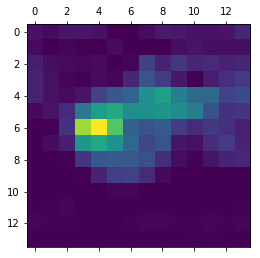

In [6]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

#### Superimposing the heatmap with the original picture

In [7]:
import cv2

img = cv2.imread(imp_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('elephant_cam.jpg', superimposed_img)

True

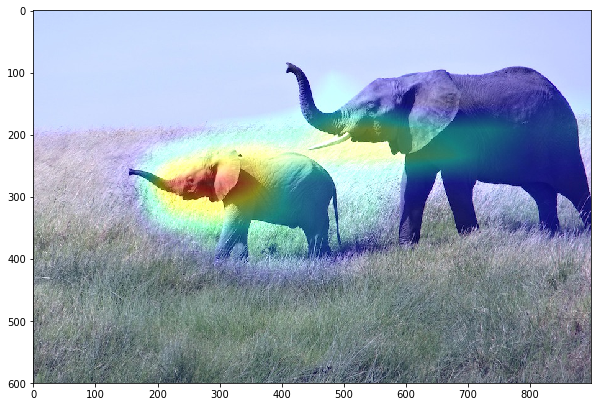

In [8]:
img_heatmap = plt.imread('elephant_cam.jpg')

plt.figure(figsize=(10, 15))
plt.imshow(img_heatmap)

###### Pablo Minango
* pablodavid218@gmail.com 